In [154]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('precision', 4)
%matplotlib inline

In [155]:
filenames = ["../log/sched-sim-permute-{}.csv".format(i) for i in range(1, 8+1)]
dfs = [pd.read_csv(f, header=None) for f in filenames if os.path.isfile(f) and os.path.getsize(f) > 0]
df_all = pd.concat(dfs)

In [211]:
    df_all['comb'] = df_all[0].apply(str).str.split('_')
    df_all['No of applications'] = df_all['comb'].apply(len)
    df_all['FNR'] = df_all[1]
    df_all['Agg Rel Acc'] = df_all[2]
    df_all['FNRs'] = df_all[3].str.split('_')
    df_all['Rel Accs'] = df_all[4].str.split('_')
    def aa(x):
        if not isinstance(x, list):
            x = [x]
        return map(float, x)
    df_all['Rel Accs'] = df_all['Rel Accs'].fillna(df_all[2]).apply(aa)
    df_all['Min Rel Acc Loss'] = df_all['Rel Accs'].apply(min)
    df_all['Max Rel Acc Loss'] = df_all['Rel Accs'].apply(max)

In [165]:
plot_kwargs = {'x_jitter': .15, 'fit_reg': False}

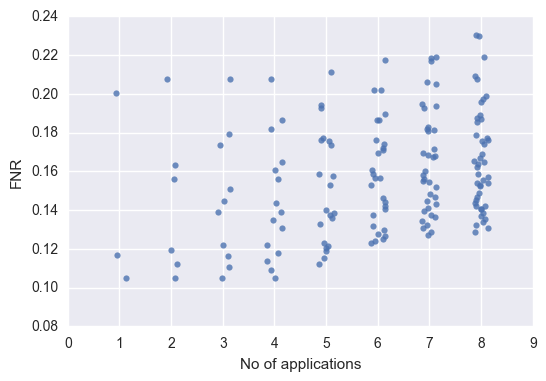

In [166]:
sns.regplot(df_all['No of applications'], df_all['FNR'], **plot_kwargs);

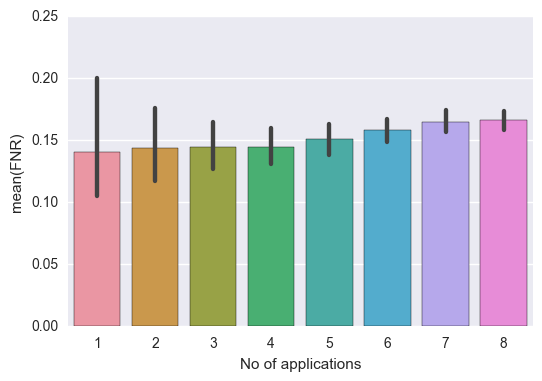

In [168]:
sns.barplot(df_all['No of applications'], df_all['FNR']);

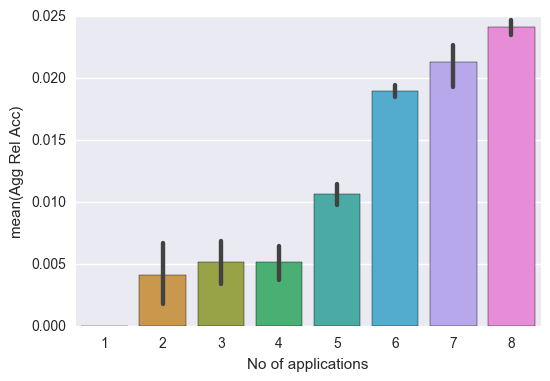

In [170]:
sns.barplot(df_all['No of applications'], df_all['Agg Rel Acc']);

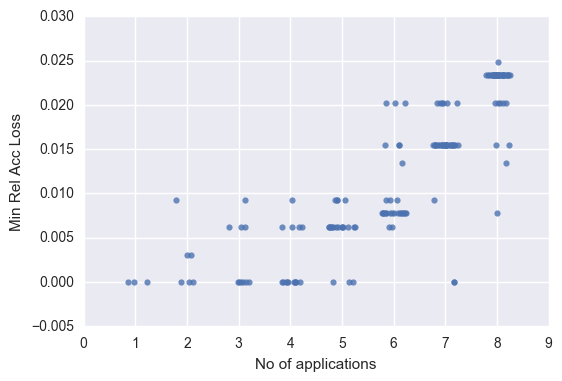

In [221]:
sns.regplot(df_all['No of applications'], df_all['Min Rel Acc Loss'], x_jitter=.25, fit_reg=False);

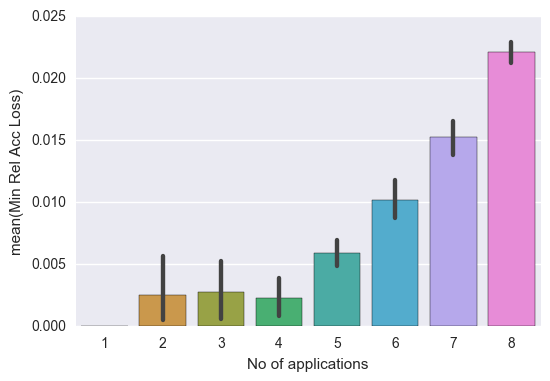

In [213]:
sns.barplot(df_all['No of applications'], df_all['Min Rel Acc Loss']);

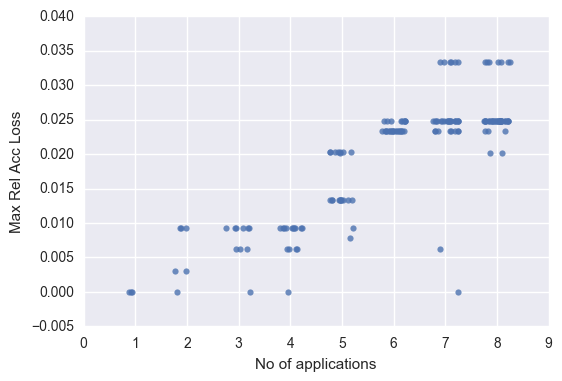

In [220]:
sns.regplot(df_all['No of applications'], df_all['Max Rel Acc Loss'], x_jitter=.25, fit_reg=False);

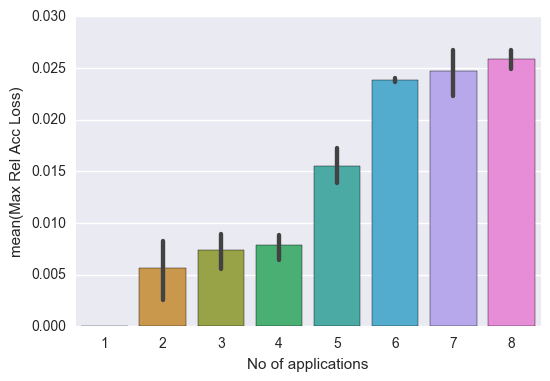

In [214]:
sns.barplot(df_all['No of applications'], df_all['Max Rel Acc Loss']);

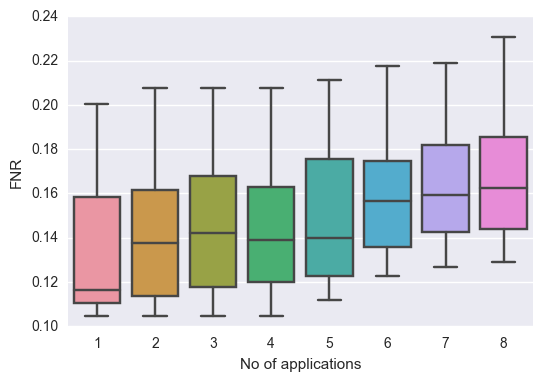

In [164]:
sns.boxplot(data=df_all, x='No of applications', y='FNR');

N.B. X-axis jitter is artificial (to distinguish the points)

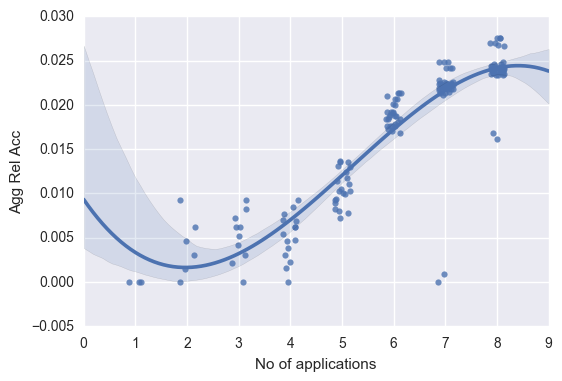

In [160]:
sns.regplot(df_all['No of applications'], df_all['Agg Rel Acc'], **plot_kwargs);

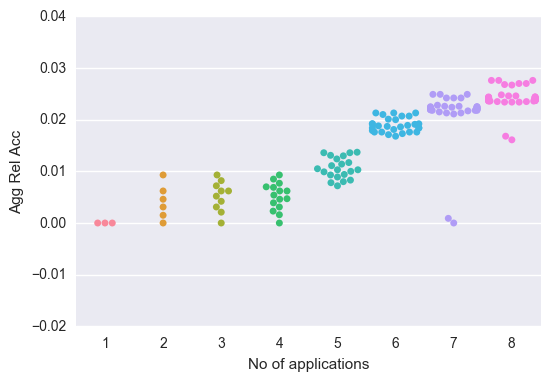

In [161]:
sns.swarmplot(data=df_all, x='No of applications', y='Agg Rel Acc');

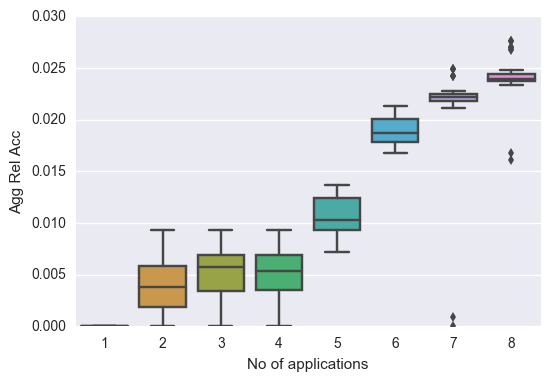

In [162]:
sns.boxplot(data=df_all, x='No of applications', y='Agg Rel Acc');

In [163]:
df_all[['No of applications', 'comb', 'FNR', 'Agg Rel Acc', 'FNRs', 'Rel Accs']]

,No of applications,comb,FNR,Agg Rel Acc,FNRs,Rel Accs
0,1,[mean=0],0.1166,0.0000,NaN,NaN
1,1,[mean=1],0.2004,0.0000,NaN,NaN
2,1,[mean=2],0.1048,0.0000,NaN,NaN
0,2,"[mean=0, 0]",0.1193,0.0031,"[0.1193, 0.1193]","[0.00305637310392, 0.00305637310392]"
1,2,"[mean=0, 1]",0.1635,0.0062,"[0.1193, 0.2078]","[0.00305637310392, 0.00925462731366]"
2,2,"[mean=0, 2]",0.1120,0.0015,"[0.1193, 0.1048]","[0.00305637310392, 0.0]"
3,2,"[mean=1, 1]",0.2078,0.0093,"[0.2078, 0.2078]","[0.00925462731366, 0.00925462731366]"
4,2,"[mean=1, 2]",0.1563,0.0046,"[0.2078, 0.1048]","[0.00925462731366, 0.0]"
5,2,"[mean=2, 2]",0.1048,0.0000,"[0.1048, 0.1048]","[0.0, 0.0]"
0,3,"[mean=0, 0, 0]",0.1221,0.0062,"[0.1221, 0.1221, 0.1221]","[0.00622594521168, 0.00622594521168, 0.0062259..."
